In [1]:
#################################
#                               #
#         Data Science          #
#      Reseaux de neurones      #
#                               #
#################################

In [1]:
# Librairies à importer

import numpy as np
import pandas as pd

import os
import glob
import shutil
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# Data

In [2]:
# Importation des données "fashion_mnist"

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("x_train.shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

x_train.shape :  (60000, 28, 28)
x_test.shape :  (10000, 28, 28)
y_train.shape :  (60000,)
y_test.shape :  (10000,)


In [4]:
# Normalisation

x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
print("x_train.shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

x_train.shape :  (60000, 784)
x_test.shape :  (10000, 784)
y_train.shape :  (60000, 10)
y_test.shape :  (10000, 10)


# Perceptron n°1

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 52us/sample - loss: 0.4637 - accuracy: 0.8375 - val_loss: 0.4466 - val_accuracy: 0.8410
Epoch 2/10
54000/54000 [==============================] - 3s 48us/sample - loss: 0.4422 - accuracy: 0.8456 - val_loss: 0.4373 - val_accuracy: 0.8452
Epoch 3/10
54000/54000 [==============================] - 3s 49us/sample - loss: 0.4276 - accuracy: 0.8505 - val_loss: 0.4349 - val_accuracy: 0.8410
Epoch 4/10
54000/54000 [==============================] - 3s 51us/sample - loss: 0.4196 - accuracy: 0.8537 - val_loss: 0.4213 - val_accuracy: 0.8537
Epoch 5/10
54000/54000 [==============================] - 3s 48us/sample - loss: 0.4132 - accuracy: 0.8554 - val_loss: 0.4301 - val_accuracy: 0.8485
Epoch 6/10
54000/54000 [==============================] - 3s 50us/sample - loss: 0.4047 - accuracy: 0.8585 - val_loss: 0.4098 - val_accuracy: 0.8567
Epoch 7/10
54000/54000 [==============================] -

In [9]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8443


In [10]:
prediction = model.predict(x_train)

In [11]:
prediction

array([[2.2282068e-08, 4.5262676e-11, 6.0653088e-12, ..., 3.2003695e-04,
        4.4439634e-08, 9.9964178e-01],
       [9.9580872e-01, 5.7710582e-07, 3.3487235e-05, ..., 4.6465300e-16,
        1.5564385e-07, 2.2004751e-15],
       [3.9983439e-01, 1.0510956e-01, 4.6041176e-02, ..., 1.3648425e-06,
        7.9471717e-04, 2.3330772e-06],
       ...,
       [4.1258128e-04, 4.1086558e-04, 3.8491481e-03, ..., 6.8667820e-13,
        1.5345080e-04, 1.2922823e-12],
       [5.3967392e-01, 1.3603999e-01, 1.2730394e-01, ..., 1.1835653e-07,
        1.7732898e-03, 9.5920052e-07],
       [1.1328145e-05, 1.5001879e-06, 1.1464847e-05, ..., 1.1784784e-03,
        1.5439642e-04, 2.4708115e-05]], dtype=float32)

In [12]:
print(y_train[4])
print(prediction[4])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.01835199e-01 1.78823858e-01 1.72773493e-03 7.06823289e-01
 2.54083658e-03 1.40501097e-05 8.20869394e-03 7.25068339e-10
 2.62554677e-05 1.04769775e-08]


# Perceptron n°2

In [13]:
model2 = Sequential()
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [14]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [15]:
model2.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 58us/sample - loss: 0.5422 - accuracy: 0.8121 - val_loss: 0.4153 - val_accuracy: 0.8517
Epoch 2/10
54000/54000 [==============================] - 3s 60us/sample - loss: 0.4055 - accuracy: 0.8556 - val_loss: 0.4029 - val_accuracy: 0.8557
Epoch 3/10
54000/54000 [==============================] - 3s 61us/sample - loss: 0.3645 - accuracy: 0.8699 - val_loss: 0.3725 - val_accuracy: 0.8692
Epoch 4/10
54000/54000 [==============================] - 3s 52us/sample - loss: 0.3416 - accuracy: 0.8775 - val_loss: 0.3512 - val_accuracy: 0.8730
Epoch 5/10
54000/54000 [==============================] - 3s 49us/sample - loss: 0.3243 - accuracy: 0.8823 - val_loss: 0.3389 - val_accuracy: 0.8772
Epoch 6/10
54000/54000 [==============================] - 3s 49us/sample - loss: 0.3081 - accuracy: 0.8865 - val_loss: 0.3408 - val_accuracy: 0.8785
Epoch 7/10
54000/54000 [==============================] -

In [16]:
_, test_acc = model2.evaluate(x_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8747


# Perceptron n°3

In [17]:
model3 = Sequential()
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [18]:
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [19]:
model3.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 69us/sample - loss: 0.5406 - accuracy: 0.8116 - val_loss: 0.4415 - val_accuracy: 0.8443
Epoch 2/10
54000/54000 [==============================] - 3s 56us/sample - loss: 0.3942 - accuracy: 0.8586 - val_loss: 0.3829 - val_accuracy: 0.8602
Epoch 3/10
54000/54000 [==============================] - 3s 61us/sample - loss: 0.3529 - accuracy: 0.8715 - val_loss: 0.3474 - val_accuracy: 0.8742
Epoch 4/10
54000/54000 [==============================] - 4s 81us/sample - loss: 0.3339 - accuracy: 0.8762 - val_loss: 0.3438 - val_accuracy: 0.8763
Epoch 5/10
54000/54000 [==============================] - 3s 62us/sample - loss: 0.3156 - accuracy: 0.8841 - val_loss: 0.3367 - val_accuracy: 0.8777
Epoch 6/10
54000/54000 [==============================] - 3s 64us/sample - loss: 0.3042 - accuracy: 0.8882 - val_loss: 0.3452 - val_accuracy: 0.8708
Epoch 7/10
54000/54000 [==============================] -

In [20]:
_, test_acc = model3.evaluate(x_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8724


# Perceptron n°4

In [21]:
model4 = Sequential()
model4.add(Dense(50, input_dim=784, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(50, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [22]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
model4.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 77us/sample - loss: 1.0043 - accuracy: 0.6207 - val_loss: 0.5332 - val_accuracy: 0.8008
Epoch 2/10
54000/54000 [==============================] - 3s 51us/sample - loss: 0.7198 - accuracy: 0.7332 - val_loss: 0.4939 - val_accuracy: 0.8173
Epoch 3/10
54000/54000 [==============================] - 3s 48us/sample - loss: 0.6785 - accuracy: 0.7499 - val_loss: 0.4688 - val_accuracy: 0.8308
Epoch 4/10
53792/54000 [============================>.] - ETA: 0s - loss: 0.6492 - accuracy: 0.7618

In [ ]:
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

# Réseau de neurones convolutif

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print("x_train.shape : ",x_train.shape)
print("x_test.shape : ",x_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

In [ ]:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.summary()

In [ ]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
model4.fit(x_train, y_train,
           epochs=10,
           validation_split=0.1)

In [ ]:
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

# Transfer Learning

In [ ]:
# Librairies à importer

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
#########
#
# A FAIRE AVANT LA SUITE : dézipper le fichier 'images.zip' dans le dossier 'data/images/'
#
#########

In [ ]:
files = glob.glob('data/images/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
print(len(cat_files), len(dog_files))

In [ ]:
# build smaller dataset: 3,000 images for training, 1,000 images
# for validation, and 1,000 images for test dataset

cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

In [ ]:
# Save images in separte folders

train_dir = 'data/training_data'
val_dir = 'data/validation_data'
test_dir = 'data/test_data'

train_files = np.concatenate([cat_train, dog_train])
validation_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)
for fn in validation_files:
    shutil.copy(fn, val_dir)
for fn in test_files:
    shutil.copy(fn, test_dir)

In [ ]:
# Load datasets

IMG_DIM = (150, 150)

#train_files = glob.glob('data/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[2].split('.')[0].strip() for fn in train_files]

#validation_files = glob.glob('data/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[2].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,)
print('Validation dataset shape:', validation_imgs.shape)

In [ ]:
# Scale each image with pixel values between (0, 255)
# to values between (0, 1) 

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')

train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [ ]:
# visualize a sample image
   
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [ ]:
# Encode text category labels

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)

train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:10], train_labels_enc[0:10])

##### Building CNN models from scratch

In [49]:
model5 = Sequential()

# Convolution and pooling layers

input_shape = (150, 150, 3)
model5.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [50]:
# Train the model
#
# 1. The batch_size indicates the total number of images
# passed to the model per iteration
# 2. The weights of the units in layers are updated after
# each iteration
# 3. The total number of iterations is always equal to the
# total number of training samples divided by the batch_size
# 4. An epoch is when the complete dataset has passed through
# the network once, that is, all the iterations are completed
# based on data batches

batch_size = 30
num_classes = 2
epochs = 30

history = model5.fit(x=train_imgs_scaled, y=train_labels_enc, 
                    validation_data=(validation_imgs_scaled,
                    validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 56s 19ms/sample - loss: 0.8101 - accuracy: 0.5657 - val_loss: 0.6085 - val_accuracy: 0.6640
Epoch 2/30
3000/3000 [==============================] - 55s 18ms/sample - loss: 0.6305 - accuracy: 0.6553 - val_loss: 0.6365 - val_accuracy: 0.6340
Epoch 3/30
3000/3000 [==============================] - 55s 18ms/sample - loss: 0.5538 - accuracy: 0.7213 - val_loss: 0.5918 - val_accuracy: 0.7050
Epoch 4/30
3000/3000 [==============================] - 53s 18ms/sample - loss: 0.4769 - accuracy: 0.7687 - val_loss: 0.5520 - val_accuracy: 0.7340
Epoch 5/30
3000/3000 [==============================] - 55s 18ms/sample - loss: 0.3951 - accuracy: 0.8183 - val_loss: 0.5709 - val_accuracy: 0.7360
Epoch 6/30
3000/3000 [==============================] - 57s 19ms/sample - loss: 0.2945 - accuracy: 0.8720 - val_loss: 0.6927 - val_accuracy: 0.7360
Epoch 7/30
3000/3000 [==============================] - 57s 19ms

In [53]:
model5.save('cats_dogs_basic_cnn.h5')

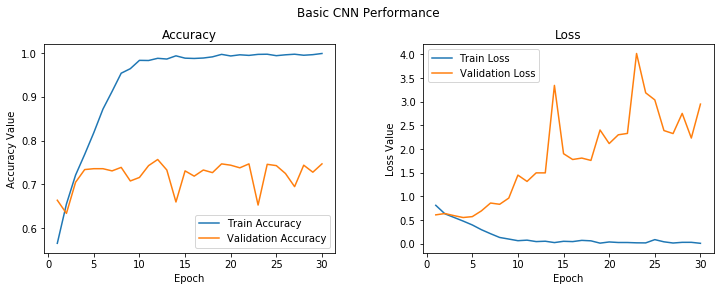

In [57]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building CNN models with regularization

In [58]:
# Let's improve upon our base CNN model by adding in one
# more convolution layer, another dense hidden layer.
# Besides this, we will add dropout of 0.3 after each
# hidden dense layer to enable regularization (it can be
# applied separately to both input layers and the hidden layers).

modelR = Sequential()

# Convolutional and pooling layers

input_shape = (150, 150, 3)
modelR.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelR.add(MaxPooling2D(pool_size=(2, 2)))
modelR.add(Flatten())
modelR.add(Dense(512, activation='relu'))
modelR.add(Dropout(0.3))
modelR.add(Dense(512, activation='relu'))
modelR.add(Dropout(0.3))
modelR.add(Dense(1, activation='sigmoid'))

modelR.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(),
                 metrics=['accuracy'])
modelR.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [59]:
# Train the model

historyR = modelR.fit(x=train_imgs_scaled, y=train_labels_enc, 
                    validation_data=(validation_imgs_scaled,
                    validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 45s 15ms/sample - loss: 0.7484 - accuracy: 0.5060 - val_loss: 0.6915 - val_accuracy: 0.5870
Epoch 2/30
3000/3000 [==============================] - 48s 16ms/sample - loss: 0.6928 - accuracy: 0.5517 - val_loss: 0.6731 - val_accuracy: 0.5510
Epoch 3/30
3000/3000 [==============================] - 43s 14ms/sample - loss: 0.6808 - accuracy: 0.5873 - val_loss: 0.6381 - val_accuracy: 0.6490
Epoch 4/30
3000/3000 [==============================] - 42s 14ms/sample - loss: 0.6464 - accuracy: 0.6577 - val_loss: 0.5715 - val_accuracy: 0.7040
Epoch 5/30
3000/3000 [==============================] - 42s 14ms/sample - loss: 0.5814 - accuracy: 0.7033 - val_loss: 0.5544 - val_accuracy: 0.7200
Epoch 6/30
3000/3000 [==============================] - 42s 14ms/sample - loss: 0.5422 - accuracy: 0.7290 - val_loss: 0.5419 - val_accuracy: 0.7230
Epoch 7/30
3000/3000 [==============================] - 42s 14ms

In [60]:
modelR.save('cats_dogs_regul_cnn.h5')

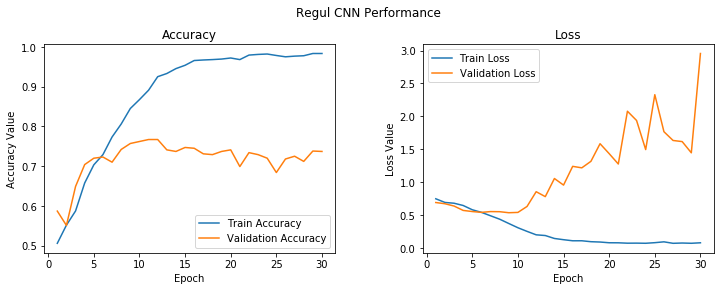

In [61]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))

ax1.plot(epoch_list, historyR.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyR.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyR.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyR.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building CNN model with image augmentation

In [62]:
# The idea behind image augmentation is that we follow
# a set process of taking in existing images from our
# training dataset and applying some image transformation
# operations to them, such as rotation, shearing, translation
# zooming, and so on, to produce new, altered versions of
# existing images. Due to these random transformations,
# we don't get the same images each time, and we will
# leverage Python generators to feed in these new images
# to our model during training.

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                      rotation_range=50,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


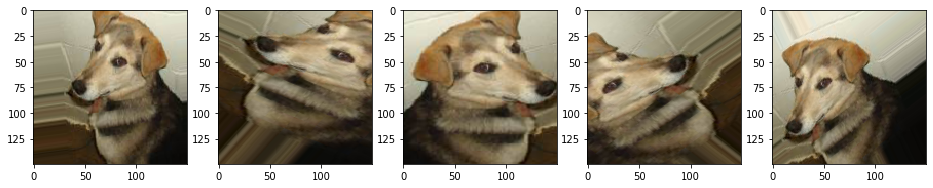

In [63]:
# Display an example of cat image

img_id = 2595
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1],
                                      train_labels[img_id:img_id+1],
                                      batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [64]:
# We just apply image augmentation transformations only
# on the training images

train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                        batch_size=30)
val_generator = val_datagen.flow(validation_imgs,
                                    validation_labels_enc,
                                    batch_size=20)

In [65]:
# Train a CNN model with regularization using the image
# augmentation data generators we created. We will use
# the same model architecture from before

modelRIA = Sequential()

# Convolution and pooling layers

input_shape = (150, 150, 3)
modelRIA.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
modelRIA.add(MaxPooling2D(pool_size=(2, 2)))
modelRIA.add(Flatten())
modelRIA.add(Dense(512, activation='relu'))
modelRIA.add(Dropout(0.3))
modelRIA.add(Dense(512, activation='relu'))
modelRIA.add(Dropout(0.3))
modelRIA.add(Dense(1, activation='sigmoid'))

# We reduce the default learning rate by a factor of 10 here
# for our optimizer to prevent the model from getting stuck
# in a local minima or overfit, as we will be sending a lot
# of images with random transformations

modelRIA.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=1e-4),
                 metrics=['accuracy'])

modelRIA.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [66]:
# Train the model
#
# We will leverage the fit_generator(...) function from
# Keras to train this model. The train_generator generates
# 30 images each time, so we will use the steps_per_epoch
# parameter and set it to 100 to train the model on 3,000
# randomly generated images from the training data for each
# epoch. Our val_generator generates 20 images each time so
# we will set the validation_steps parameter to 50 to validate
# our model accuracy on all the 1,000 validation images
# (remember we are not augmenting our validation dataset).

historyRIA = modelRIA.fit_generator(train_generator,
                                 steps_per_epoch=100, epochs=100,
                                 validation_data=val_generator,
                                 validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 69s 689ms/step - loss: 0.6879 - accuracy: 0.5223 - val_loss: 0.6748 - val_accuracy: 0.5420
Epoch 2/100
100/100 [==============================] - 68s 683ms/step - loss: 0.6734 - accuracy: 0.5797 - val_loss: 0.6631 - val_accuracy: 0.5700
Epoch 3/100
100/100 [==============================] - 68s 684ms/step - loss: 0.6676 - accuracy: 0.5847 - val_loss: 0.6924 - val_accuracy: 0.5520
Epoch 4/100
100/100 [==============================] - 68s 678ms/step - loss: 0.6591 - accuracy: 0.5860 - val_loss: 0.7151 - val_accuracy: 0.5540
Epoch 5/100
100/100 [==============================] - 68s 682ms/step - loss: 0.6443 - accuracy: 0.6177 - val_loss: 0.6160 - val_accuracy: 0.6660
Epoch 6/100
100/100 [==============================] - 68s 681ms/step - loss: 0.6379 - accuracy: 0.6300 - val_loss: 0.6095 - val_accuracy: 0.6670
Epoch 7/100
100/100 [==============================] - 68s 679ms/step - loss: 0.6228 - accuracy: 0.6513 - val_loss: 0.5847 -

Epoch 57/100
100/100 [==============================] - 67s 673ms/step - loss: 0.4539 - accuracy: 0.7870 - val_loss: 0.4175 - val_accuracy: 0.8130
Epoch 58/100
100/100 [==============================] - 68s 676ms/step - loss: 0.4491 - accuracy: 0.7850 - val_loss: 0.3880 - val_accuracy: 0.8350
Epoch 59/100
100/100 [==============================] - 68s 680ms/step - loss: 0.4512 - accuracy: 0.7890 - val_loss: 0.4253 - val_accuracy: 0.8210
Epoch 60/100
100/100 [==============================] - 68s 682ms/step - loss: 0.4467 - accuracy: 0.7900 - val_loss: 0.4010 - val_accuracy: 0.8250
Epoch 61/100
100/100 [==============================] - 68s 684ms/step - loss: 0.4575 - accuracy: 0.7783 - val_loss: 0.3744 - val_accuracy: 0.8490
Epoch 62/100
100/100 [==============================] - 68s 683ms/step - loss: 0.4350 - accuracy: 0.7993 - val_loss: 0.4566 - val_accuracy: 0.7920
Epoch 63/100
100/100 [==============================] - 68s 681ms/step - loss: 0.4339 - accuracy: 0.7987 - val_loss: 0

In [67]:
modelRIA.save('cats_dogs_regulimgaug_cnn.h5')

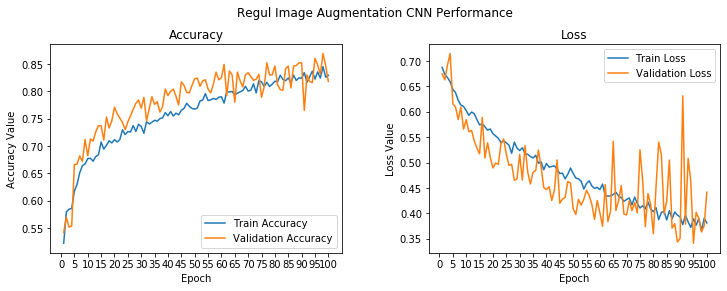

In [68]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul Image Augmentation CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))

ax1.plot(epoch_list, historyRIA.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyRIA.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyRIA.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyRIA.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Leveraging transfer learning with pretrained CNN models

In [69]:
# Pretrained models are used in the following two popular
# ways when building new models or reusing them:
#  - Using a pretrained model as a feature extractor
#  - Fine-tuning the pretrained model

# The pretrained model used is the popular VGG-16 model,
# created by the Visual Geometry Group at the University
# of Oxford. The VGG-16 model is a 16-layer (convolution
# and fully connected) network built on the ImageNet
# database (https://arxiv.org/pdf/1409.1556.pdf).

In [70]:
# Load up the VGG-16 model, and freeze the convolution
# blocks so that we can use it as just an image feature
# extractor

from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [71]:
# To verify that the layers of the VGG-16 model are frozen
# which is good because we don't want their weights to change
# during model training.

pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x63388ec50>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x633420ad0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x633463390>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x6333e6ed0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x63467f890>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x6338a9110>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x6338a9810>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x6339a7790>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x6339b1c10>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x6335d5b90>,block3_conv3,False


##### Building Pretrained CNN model as a feature extractor

In [72]:
# Extract out the bottleneck features from the training
# and validation sets

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape,
      '\tValidation Bottleneck Features:',validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [73]:
# The preceding output tells us that we have successfully
# extracted the flattened bottleneck features of dimension
# 1 x 8,192 for the 3,000 training images and the 1,000 validation
# images. Let's build the architecture of the deep neural network
# classifier now, which will take these features as input:

modelTL1 = Sequential()

input_shape = vgg_model.output_shape[1]
modelTL1.add(InputLayer(input_shape=(input_shape,)))
modelTL1.add(Dense(512, activation='relu', input_dim=input_shape))
modelTL1.add(Dropout(0.3))
modelTL1.add(Dense(512, activation='relu'))
modelTL1.add(Dropout(0.3))
modelTL1.add(Dense(1, activation='sigmoid'))
modelTL1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

modelTL1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Train the model

historyTL1 = modelTL1.fit(x=train_features_vgg, y=train_labels_enc,
                       validation_data=(validation_features_vgg, validation_labels_enc),
                       batch_size=batch_size, epochs=epochs, verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 6s 2ms/sample - loss: 0.4412 - accuracy: 0.7813 - val_loss: 0.2820 - val_accuracy: 0.8850
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.3070 - accuracy: 0.8687 - val_loss: 0.2520 - val_accuracy: 0.8770
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.2510 - accuracy: 0.8967 - val_loss: 0.2152 - val_accuracy: 0.9060
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.2155 - accuracy: 0.9147 - val_loss: 0.2989 - val_accuracy: 0.8740
Epoch 5/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.1818 - accuracy: 0.9270 - val_loss: 0.2369 - val_accuracy: 0.8920
Epoch 6/30
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.1492 - accuracy: 0.9407 - val_loss: 0.2110 - val_accuracy: 0.9110
Epoch 7/30
3000/3000 [==============================] - 5s 2ms/sample - loss

In [75]:
modelTL1.save('cats_dogs_tl1.h5')

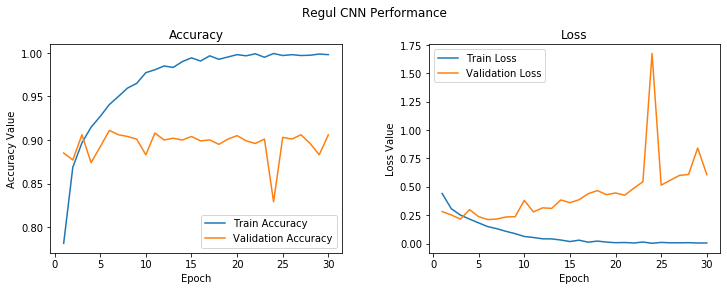

In [76]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))

ax1.plot(epoch_list, historyTL1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyTL1.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyTL1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyTL1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building Pretrained CNN model with image augmentation as a feature extractor

In [77]:
# Data generators

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                      rotation_range=50,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [78]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                     batch_size=30)
val_generator = val_datagen.flow(validation_imgs,
                                 validation_labels_enc,
                                 batch_size=20)

In [81]:
modelTL2 = Sequential()

modelTL2.add(vgg_model)
modelTL2.add(Dense(512, activation='relu', input_dim=input_shape))
modelTL2.add(Dropout(0.3))
modelTL2.add(Dense(512, activation='relu'))
modelTL2.add(Dropout(0.3))
modelTL2.add(Dense(1, activation='sigmoid'))

modelTL2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

modelTL2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

In [82]:
# Train the model

historyTL2 = modelTL2.fit_generator(train_generator, steps_per_epoch=100,
                                 epochs=100,
                                 validation_data=val_generator,
                                 validation_steps=50,
                                 verbose=1)

Epoch 1/100
100/100 [==============================] - 292s 3s/step - loss: 0.6577 - accuracy: 0.6053 - val_loss: 0.5531 - val_accuracy: 0.8340
Epoch 2/100
100/100 [==============================] - 271s 3s/step - loss: 0.5633 - accuracy: 0.7170 - val_loss: 0.4237 - val_accuracy: 0.8490
Epoch 3/100
100/100 [==============================] - 271s 3s/step - loss: 0.5266 - accuracy: 0.7400 - val_loss: 0.2224 - val_accuracy: 0.8550
Epoch 4/100
100/100 [==============================] - 272s 3s/step - loss: 0.4926 - accuracy: 0.7577 - val_loss: 0.2405 - val_accuracy: 0.8600
Epoch 5/100
100/100 [==============================] - 270s 3s/step - loss: 0.4708 - accuracy: 0.7747 - val_loss: 0.2348 - val_accuracy: 0.8830
Epoch 6/100
100/100 [==============================] - 272s 3s/step - loss: 0.4455 - accuracy: 0.7867 - val_loss: 0.3257 - val_accuracy: 0.8800
Epoch 7/100
100/100 [==============================] - 270s 3s/step - loss: 0.4423 - accuracy: 0.7883 - val_loss: 0.2718 - val_accuracy:

In [83]:
modelTL2.save('cats_dogs_tl2.h5')

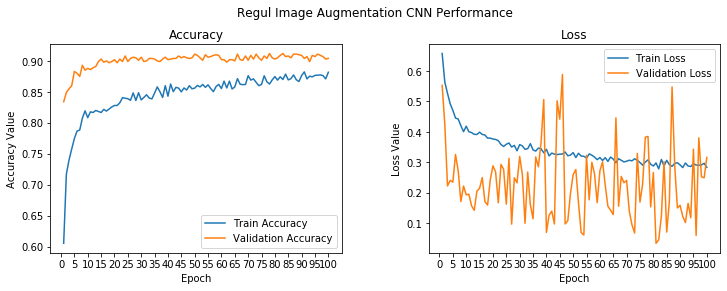

In [84]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul Image Augmentation CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))

ax1.plot(epoch_list, historyTL2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyTL2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyTL2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyTL2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

##### Building Pretrained CNN model with image augmentation and with fine-tuning

In [85]:
# Leverage VGG-16 model object stored in the vgg_model variable
# and unfreeze convolution blocks 4 and 5 while keeping the first
# three blocks frozen

vgg_model.trainable = True
set_trainable = False

for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1/kernel:0' shape=(3, 3, 256, 512) dtype=float32, numpy=
array([[[[-1.24538150e-02,  8.40655994e-03, -5.28845051e-03, ...,
          -2.04581907e-03, -3.92359449e-03,  1.30683812e-03],
         [ 1.15566896e-02,  2.46055960e-03, -4.09082584e-02, ...,
          -4.92062652e-03, -1.63423386e-03,  8.94230697e-03],
         [-1.43469922e-04, -5.65873180e-03,  1.84066985e-02, ...,
          -2.08840682e-03,  2.63321817e-06, -2.50728261e-02],
         ...,
         [ 1.37888230e-02, -6.58180192e-03,  9.65370331e-03, ...,
           7.17610447e-03,  3.45725450e-03,  5.33173978e-03],
         [ 2.65833316e-03,  7.77704641e-04,  2.86239345e-04, ...,
          -5.40583069e-03,  8.93119723e-03,  1.40043022e-02],
         [-8.53933115e-03,  1.43394794e-03, -2.91879033e-03, ...,
           3.77660524e-03,  2.05454584e-02, -1.35868033e-02]],

        [[-1.20176468e-02,  1.51250837e-03,  3.43130133e-03, ...,
          -1.57830697e-02, -2.39501009e-03,  2.93

In [86]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x63388ec50>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x633420ad0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x633463390>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x6333e6ed0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x63467f890>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x6338a9110>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x6338a9810>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x6339a7790>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x6339b1c10>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x6335d5b90>,block3_conv3,False


In [87]:
# Data generators

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                      rotation_range=50,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

In [88]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                        batch_size=30)

val_generator = val_datagen.flow(validation_imgs,
                                    validation_labels_enc,
                                    batch_size=20)

In [89]:
modelTL3 = Sequential()

modelTL3.add(vgg_model)
modelTL3.add(Dense(512, activation='relu', input_dim=input_shape))
modelTL3.add(Dropout(0.3))
modelTL3.add(Dense(512, activation='relu'))
modelTL3.add(Dropout(0.3))
modelTL3.add(Dense(1, activation='sigmoid'))

modelTL3.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=1e-5),
                 metrics=['accuracy'])

modelTL3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
__________________________________

In [ ]:
# Train the model

historyTL3 = modelTL3.fit_generator(train_generator, steps_per_epoch=100,
                                 epochs=100,
                                 validation_data=val_generator,
                                 validation_steps=50,
                                 verbose=1)

In [ ]:
modelTL3.save('cats_dogs_tl3.h5')

In [ ]:
# Display accuracy values

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regul Image Augmentation CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))

ax1.plot(epoch_list, historyTL3.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, historyTL3.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, historyTL3.history['loss'], label='Train Loss')
ax2.plot(epoch_list, historyTL3.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")